In [3]:
import sys
sys.path.append('../../src')
from config import Paths

In [4]:
import pandas as pd

df = pd.read_csv(Paths.testnino1_classification_task, usecols=['id', 'Data', 'Link', 'Titolo', 'Testo', 'Stato Workflow'])

df['Data'] = pd.to_datetime(df['Data'])

target_column = 'Stato Workflow'

# remove rows not validated by the analyst
df = df[df[target_column] != 'N']

print(df.dtypes)
print(df.shape)

id                         int64
Data              datetime64[ns]
Link                      object
Titolo                    object
Testo                     object
Stato Workflow            object
dtype: object
(6857, 6)


In [5]:
df.head()

,id,Data,Link,Titolo,Testo,Stato Workflow
21,1183085712,2023-10-01,http://www.instagram.com/p/Cx4rX8bIpqk,Carmine Abate Architetto - carmine_abate_archi...,Carmine Abate Architetto - carmine_abate_archi...,Y
147,1183650630,2023-10-01,http://www.instagram.com/p/Cx3WMtZt7TU,Hotel Muchele - hotel_muchele (5040069464),Hotel Muchele - hotel_muchele (5040069464) 42 ...,Y
148,1183650631,2023-10-02,http://www.instagram.com/p/Cx31kqFJtS0,AdrianaValle PatriciaCarvalho - migsarquitetur...,AdrianaValle PatriciaCarvalho - migsarquitetur...,Y
152,1183731635,2023-10-02,http://www.instagram.com/p/Cx38Y5ZysBx,miya《東京カフェ巡り》 - miya_tokyocafe (40616149605),miya《東京カフェ巡り》 - miya_tokyocafe (40616149605) 2...,Y
155,1183875489,2023-10-02,http://www.instagram.com/p/Cx4KaQbPMMx,✴︎an yuma✴︎ interior/life/beauty... - anyuma_n...,✴︎an yuma✴︎ interior/life/beauty... - anyuma_n...,Y


Stato Workflow
D    4225
Y    2632
Name: count, dtype: int64


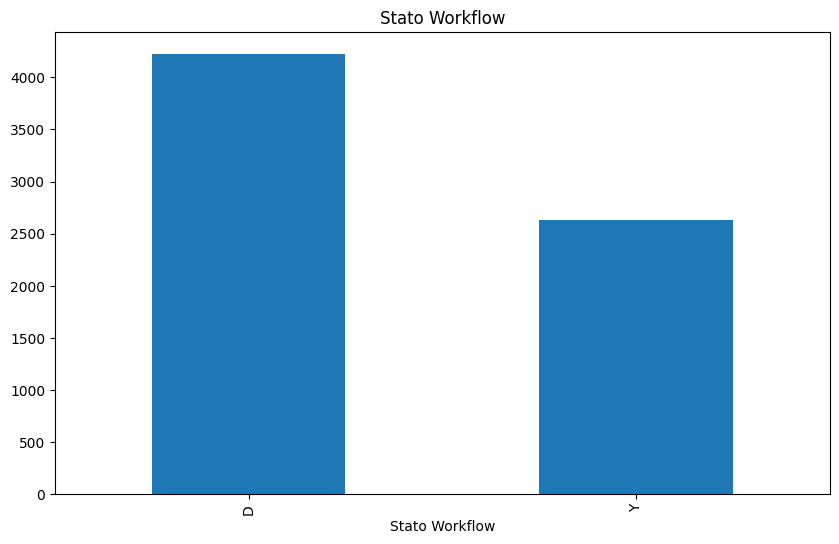

In [6]:
import matplotlib.pyplot as plt

column_counts = df[target_column].value_counts()
print(column_counts)
column_counts.plot(kind='bar', figsize=(10, 6))
plt.title(target_column)
plt.show()


In [ ]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.pipeline import FunctionTransformer, Pipeline
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import logging
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

logging.basicConfig(level=logging.INFO)

classifiers = [
    GradientBoostingClassifier(random_state=42),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    QuadraticDiscriminantAnalysis(),
    GaussianNB(),
]

datasets = {
    "10" : df.sample(n=10, random_state=42),
    "100" : df.sample(n=100, random_state=42),
    "1_000" : df.sample(n=1000, random_state=42),
}

results = {}
# Create a FunctionTransformer to convert sparse matrices to dense ones
to_dense = FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)

# Create pipelines
for clf in classifiers:

    # Create a separate pipeline for the GaussianClassifiers
    if isinstance(clf, GaussianProcessClassifier) or isinstance(clf, GaussianNB) or isinstance(clf, QuadraticDiscriminantAnalysis):
        pipeline = Pipeline(
            [
                ("vect", CountVectorizer()),
                ("tfidf", TfidfTransformer()),
                ("to_dense", to_dense),
                ("clf", clf),
            ]
        )
    else:
        pipeline = Pipeline(
            [
                ("vect", CountVectorizer()),
                ("tfidf", TfidfTransformer()),
                ("clf", clf),
            ]
        )
        
    for dataset_key in datasets.keys():
        model_name = f"{dataset_key}-{clf.__class__.__name__}-{clf.get_params()}"
        print("***************************************************************")
        print(f"Evaluating model {model_name}...")
        try:
            
            scores = cross_val_score(pipeline, datasets[dataset_key]["Testo"], datasets[dataset_key]["Stato Workflow"], cv=5)
            
            
            results[model_name] = scores
            print(f"{model_name}")
            print(f"{scores.mean():.2f} (+/- {scores.std() * 2:.2f})")
            print("***************************************************************\n\n")
        except Exception as e:
            print(f"An error occurred: {str(e)}")


# Train the classifier
# pipeline.fit(X_train, y_train)

# # Predict the labels
# predictions = pipeline.predict(X_test)

# predictions


# # Compare the classifiers
# for clf in classifiers:
#     scores = cross_val_score(clf, X, y, cv=5)
#     print(f"{clf.__class__.__name__}: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

In [ ]:
for model_name, score in results.items():
    print(model_name)
    print(f"{score.mean():.2f} (+/- {score.std() * 2:.2f})")
    print()


In [7]:
import time
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.pipeline import FunctionTransformer, Pipeline
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score


classifiers = [
    GradientBoostingClassifier(random_state=42),
    KNeighborsClassifier(n_jobs=-1),
    SVC(random_state=42),
    GaussianProcessClassifier(random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(n_jobs=-1, random_state=42),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    QuadraticDiscriminantAnalysis(),
    GaussianNB(),
]

datasets = {
    "10" :      train_test_split(df['Testo'], df['Stato Workflow'], random_state=42, train_size=10),
    "50" :      train_test_split(df['Testo'], df['Stato Workflow'], random_state=42, train_size=50),
    "100" :     train_test_split(df['Testo'], df['Stato Workflow'], random_state=42, train_size=100),
    "200" :     train_test_split(df['Testo'], df['Stato Workflow'], random_state=42, train_size=200),
    "500" :     train_test_split(df['Testo'], df['Stato Workflow'], random_state=42, train_size=500),
    "750" :     train_test_split(df['Testo'], df['Stato Workflow'], random_state=42, train_size=750),
    "1_000" :   train_test_split(df['Testo'], df['Stato Workflow'], random_state=42, train_size=1_000),
}

cms = {}
accuracies = {}
fit_times = {}
prediction_times = {}


# Create a FunctionTransformer to convert sparse matrices to dense ones
to_dense = FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)

# Create pipelines
for clf in classifiers:

    # Create a separate pipeline for the GaussianClassifiers
    if isinstance(clf, GaussianProcessClassifier) or isinstance(clf, GaussianNB) or isinstance(clf, QuadraticDiscriminantAnalysis):
        pipeline = Pipeline(
            [
                ("vect", CountVectorizer()),
                ("tfidf", TfidfTransformer()),
                ("to_dense", to_dense),
                ("clf", clf),
            ]
        )
    else:
        pipeline = Pipeline(
            [
                ("vect", CountVectorizer()),
                ("tfidf", TfidfTransformer()),
                ("clf", clf),
            ]
        )
        
    for key in datasets.keys():
        model_name = f"{key}-{clf.__class__.__name__}-{clf.get_params()}"
        X_train = datasets[key][0]
        X_test = datasets[key][1]
        y_train = datasets[key][2]
        y_test = datasets[key][3]

        print("***************************************************************")
        print(f"Evaluating model {model_name}...")
        try:
            
            start_time = time.time()
            pipeline.fit(X_train, y_train)
            fit_time = time.time() - start_time
            fit_times[model_name] = fit_time

            start_time = time.time()
            y_pred = pipeline.predict(X_test)
            prediction_time = time.time() - start_time
            prediction_times[model_name] = prediction_time
            
            cm = confusion_matrix(y_test, y_pred)
            cms[model_name] = cm
            
            accuracy = accuracy_score(y_test, y_pred)
            accuracies[model_name] = accuracy
            
            print(f"{model_name}")
            print(f"{accuracy:.2f}")
            print("***************************************************************\n\n")
        except Exception as e:
            print(f"An error occurred: {str(e)}")
            
import pickle

# Save the dictionaries to a file
with open('results.pkl', 'wb') as file:
    pickle.dump(cms, file)
    pickle.dump(accuracies, file)
    pickle.dump(fit_times, file)
    pickle.dump(prediction_times, file)



***************************************************************
Evaluating model 10-GradientBoostingClassifier-{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}...
10-GradientBoostingClassifier-{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0,

/home/arau6/projects/wl-semsearch-poc/.venv/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


10-QuadraticDiscriminantAnalysis-{'priors': None, 'reg_param': 0.0, 'store_covariance': False, 'tol': 0.0001}
0.61
***************************************************************


***************************************************************
Evaluating model 50-QuadraticDiscriminantAnalysis-{'priors': None, 'reg_param': 0.0, 'store_covariance': False, 'tol': 0.0001}...


/home/arau6/projects/wl-semsearch-poc/.venv/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


50-QuadraticDiscriminantAnalysis-{'priors': None, 'reg_param': 0.0, 'store_covariance': False, 'tol': 0.0001}
0.45
***************************************************************


***************************************************************
Evaluating model 10-GaussianNB-{'priors': None, 'var_smoothing': 1e-09}...
10-GaussianNB-{'priors': None, 'var_smoothing': 1e-09}
0.65
***************************************************************


***************************************************************
Evaluating model 50-GaussianNB-{'priors': None, 'var_smoothing': 1e-09}...
50-GaussianNB-{'priors': None, 'var_smoothing': 1e-09}
0.72
***************************************************************




In [13]:
import pickle

# Save the dictionaries to a file
with open('results.pkl', 'wb') as file:
    pickle.dump(cms, file)
    pickle.dump(accuracies, file)
    pickle.dump(fit_times, file)
    pickle.dump(prediction_times, file)

# # Load the dictionaries from the file
# with open('results.pkl', 'rb') as file:
#     cms = pickle.load(file)
#     accuracies = pickle.load(file)
#     fit_times = pickle.load(file)
#     prediction_times = pickle.load(file)
    



In [10]:
for model_name, accuracy in accuracies.items():
    print(model_name)
    print(f"{accuracy:.2f}")
    print(f"{cms[model_name]}")
    print(f"fit_time: {fit_times[model_name]:.2f}")
    print(f"prediction_time: {prediction_times[model_name]:.2f}")
    print()


10-GradientBoostingClassifier-{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
0.60
[[3932  286]
 [2420  209]]
fit_time: 0.14
prediction_time: 0.65

50-GradientBoostingClassifier-{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start':